In [150]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Partição dos resultados em dataframes

In [151]:
folder_path = "results"

dataframes = [pd.read_csv(os.path.join(folder_path, item)) for item in os.listdir(folder_path)]

# Bert Fine Tuning
ft = dataframes[0]
# Bert Setence Transformer
st = dataframes[1]
# Traditional Models
tm = dataframes[2]

### Apresentação dos resultados

In [152]:
print("Testes utilizando uma instancia de Sentence Transformer de um modelo pré-treinado do BERT, \naplicando os Embeddings nos modelos tradicionais de ML\n")
print(st)

Testes utilizando uma instancia de Sentence Transformer de um modelo pré-treinado do BERT, 
aplicando os Embeddings nos modelos tradicionais de ML

          Model  Sentence Transfomer  Accuracy  F1-Weighted
0   bertabaporu  Logistic Regression      0.80         0.80
1   bertabaporu       Categorical NB      0.61         0.46
2   bertabaporu                  KNN      0.76         0.76
3   bertabaporu        Decision Tree      0.64         0.64
4   bertabaporu        XGBClassifier      0.78         0.78
5   bertabaporu        Random Forest      0.77         0.76
6    distilbert  Logistic Regression      0.79         0.79
7    distilbert       Categorical NB      0.61         0.46
8    distilbert                  KNN      0.75         0.74
9    distilbert        Decision Tree      0.67         0.67
10   distilbert        XGBClassifier      0.78         0.78
11   distilbert        Random Forest      0.78         0.77
12    bertimbau  Logistic Regression      0.80         0.80
13    bertim

In [153]:
print("Testes utilizando Tokenizers aplicando os Embeddings nos modelos tradicionais de ML \n")
print(tm)

Testes utilizando Tokenizers aplicando os Embeddings nos modelos tradicionais de ML 

                  Model           Vectorizer  Accuracy  F1-Weighted
0   Count - binary true  Logistic Regression      0.78         0.78
1   Count - binary true       Multinomial NB      0.76         0.75
2   Count - binary true                  KNN      0.59         0.59
3   Count - binary true        Decision Tree      0.70         0.64
4   Count - binary true        XGBClassifier      0.78         0.78
5   Count - binary true        Random Forest      0.77         0.77
6                 Count  Logistic Regression      0.77         0.77
7                 Count       Multinomial NB      0.77         0.76
8                 Count                  KNN      0.62         0.59
9                 Count        Decision Tree      0.71         0.71
10                Count        XGBClassifier      0.78         0.78
11                Count        Random Forest      0.78         0.77
12                Tfidf  Logis

In [154]:
print("Testes realizados utilizando um modelo pré-treinado do BERT para classificação de texto, utilizando seu\n próprio Tokenizador, realizando Fine Tuning com 10 Epócas e Batch de 32\n")
print(ft)

Testes realizados utilzando um modelo pré-treinado do BERT para classificação de texto, utilizando seu
 próprio Tokenizador, realizando Fine Tuning com 10 Epócas e Batch de 32

         Model  Accuracy    Loss  F1-Weighted
0  bertabaporu    0.8290  0.3811       0.8267
1   distilbert    0.8013  0.4458       0.8016
2    bertimbau    0.8139  0.3942       0.8133


### Bert Fine Tuning: Accuracy x Loss

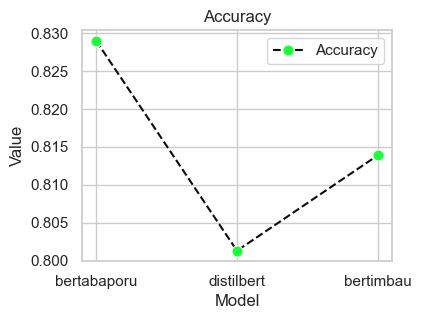

In [155]:
plt.figure(figsize=(4, 3))
sns.lineplot(x='Model', y='Accuracy', marker='o', markersize=8, markerfacecolor='#19FF39', linestyle='--', color='#0D0D0D', data=ft, label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()

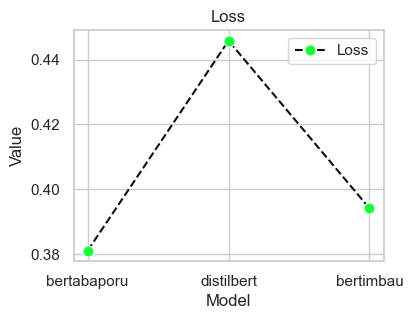

In [156]:
plt.figure(figsize=(4, 3))
sns.lineplot(x='Model', y='Loss', marker='o', markersize=8, markerfacecolor='#19FF39', linestyle='--' , color='#0D0D0D', data=ft, label='Loss')
plt.title('Loss')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()

### All Models: Accuracy Comparison

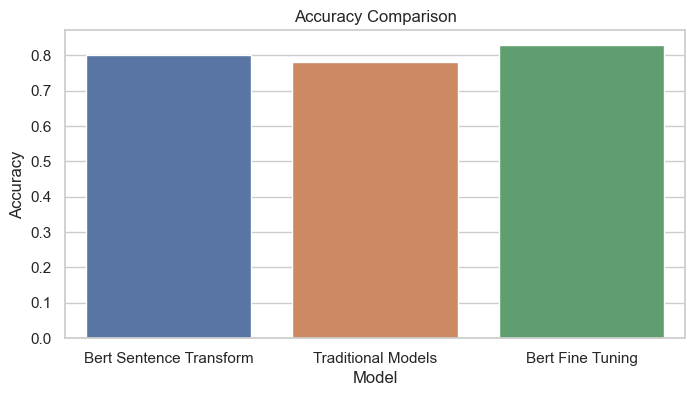

In [157]:
# Renomear os modelos de modo geral
# Bert Sentence Transform
st['Model'] = 'Bert Sentence Transform'
# Traditional Models
tm['Model'] = 'Traditional Models'
# Bert Fine Tuning
ft['Model'] = 'Bert Fine Tuning'

# lista com os três DataFrames
dataframes = [st, tm, ft]

# lista para armazenar as maiores acurácias
max_accuracies = []

# Filtrar a maior acurácia de cada dataframe
for df in dataframes:
    max_accuracy_row = df.loc[df['Accuracy'].idxmax(), ['Model', 'Accuracy']]
    max_accuracies.append(max_accuracy_row)

# Concatenar as linhas com as maiores acurácias em um único DataFrame
result_df = pd.DataFrame(max_accuracies, columns=['Model', 'Accuracy'])
result_df

# Configurações do seaborn
sns.set(style="whitegrid")

# Criação do gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Accuracy', data=result_df)

# Configurações do gráfico
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Exibição do gráfico
plt.show()

